# Disney+ Catalog — Exploratory Data Analysis (EDA)

This notebook explores a publicly available Disney+ catalog dataset.

**Goals**
- Understand catalog composition (Movies vs TV Shows)
- Inspect runtime (mins) vs seasons distributions
- Explore genre and country distributions
- Explore cast-size patterns and “unique actors per genre”

## Reproducibility & Assumptions

- The dataset is *catalog-level* metadata (no user watch history).
- File paths are relative so this notebook runs after cloning the repo.
- Cleaning is handled by `clean_streaming_df()` from `streaming_func.py`.

In [8]:
# Import core libraries and project utilities
from pathlib import Path

import numpy as np
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt

from streaming_func import clean_streaming_df, unique_actors_per_genre, plot_top_unique_actors, plot_top_countries

In [9]:
# Loading Disney+ dataset & displaying basic info on the dataframe
DATA_DIR = Path("data")
disney_df = pd.read_csv(DATA_DIR / "disney_plus_titles.csv")

disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


## Cleaning

Here, we standardise:
- column names
- multi-value columns (`cast`, `country`, `listed_in`) into Python lists
- duration into two numeric columns:
  - `duration_mins` for Movies
  - `duration_seasons` for TV Shows

### Note on platform-specific cleaning

Earlier iterations of this notebook included an Amazon-specific cleaning function.
This logic has been moved into `streaming_func.py` to keep notebooks lightweight, reusable, & focused on analysis.

The `clean_streaming_df()` function standardises column formats & converts multi-value fields (cast/country/genres) into lists, which enables consistent EDA across platforms.

In [10]:
# Data cleaning function for Disney+ dataset for easier exploration & manipulation

clean_disney_df = clean_streaming_df(disney_df)
clean_disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_mins,duration_seasons
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","[Chris Diamantopoulos, Tony Anselmo, Tress Mac...",[],"November 26, 2021",2016,TV-G,23 min,"[Animation, Family]",Join Mickey and the gang as they duck the halls!,23,<NA>
1,s2,Movie,Ernest Saves Christmas,John Cherry,"[Jim Varney, Noelle Parker, Douglas Seale]",[],"November 26, 2021",1988,PG,91 min,[Comedy],Santa Claus passes his magic bag to a new St. ...,91,<NA>
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"[Raymond Albert Romano, John Leguizamo, Denis ...",[United States],"November 26, 2021",2011,TV-G,23 min,"[Animation, Comedy, Family]",Sid the Sloth is on Santa's naughty list.,23,<NA>
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"[Darren Criss, Adam Lambert, Derek Hough, Alex...",[],"November 26, 2021",2021,TV-PG,41 min,[Musical],"This is real life, not just fantasy!",41,<NA>
4,s5,TV Show,The Beatles: Get Back,NaN,"[John Lennon, Paul McCartney, George Harrison,...",[],"November 25, 2021",2021,NaN,1 Season,"[Docuseries, Historical, Music]",A three-part documentary from Peter Jackson ca...,<NA>,1


## Quick dataset breadth checks (genres & production countries)

Before plotting, we compute how many unique genres & countries appear in the catalog.
This is a simple “breadth” sanity-check that also helps interpret long-tail plots later.

In [11]:
# Extracting unique genre types & countries from the 'listed_in' & 'country' columns respectively for Disney+ dataset
disney_genres = sorted(set(chain.from_iterable(clean_disney_df["listed_in"])))
disney_countries = sorted(set(chain.from_iterable(clean_disney_df["country"])))

print(f'Total unique genres for Disney media: {len(disney_genres)}')
print(f'Total unique production countries for Disney media: {len(disney_countries)}')

Total unique genres for Disney media: 44
Total unique production countries for Disney media: 47


In [12]:
# Extracting unique countries from the 'country' column for Disney+ dataset
disney_countries = clean_disney_df["country"]

disney_countries_unique = []
for country_list in disney_countries:
    for country in country_list:
        if country not in disney_countries_unique:
            disney_countries_unique.append(country)

print(disney_countries_unique, '\n')
print(f'Total number unique countries for Disney media production: {len(disney_countries_unique)}')

['United States', 'Canada', 'Australia', 'United Kingdom', 'South Korea', 'Ireland', 'Denmark', 'Spain', 'Poland', 'Hungary', 'France', 'Japan', 'Germany', 'India', 'Singapore', 'Thailand', 'China', 'Brazil', 'Belgium', 'Austria', 'South Africa', 'Hong Kong', 'Argentina', 'United Arab Emirates', 'Mexico', 'Switzerland', 'Taiwan', 'Philippines', 'Tanzania', 'Panama', 'Angola', 'Botswana', 'Namibia', 'Luxembourg', 'Guatemala', 'Russia', 'Malaysia', 'Kazakhstan', 'Syria', 'Iran', 'Egypt', 'Pakistan', 'New Zealand', 'Norway', 'Sweden', 'Slovenia', 'Czech Republic'] 

Total number unique countries for Disney media production: 47


## Split into Movies vs TV Shows

Many analyses differ by type (e.g. duration in minutes vs seasons), so we create two filtered dataframes.

In [13]:
# Movies-only & TV-Shows-only dataframe partitions of the cleaned Disney+ dataset
clean_shows_df = clean_disney_df[clean_disney_df["type"] == "TV Show"].copy()
clean_movies_df = clean_disney_df[clean_disney_df["type"] == "Movie"].copy()

clean_shows_df.shape, clean_movies_df.shape, clean_disney_df.shape

((398, 14), (1052, 14), (1450, 14))

## Movie runtime distribution (minutes)

We inspect the distribution of movie runtimes to understand typical lengths & whether outliers exist.


### Movie Runtime Distribution

To understand the typical length of movies on Disney+, I visualised the
distribution of movie runtimes. Extreme outliers (very long runtimes, e.g.
special editions or misclassified entries) were excluded to avoid skewing the
visualisation.

The distribution shows a strong concentration around standard feature-length
films (~90 minutes), with a right-skewed tail representing longer productions.

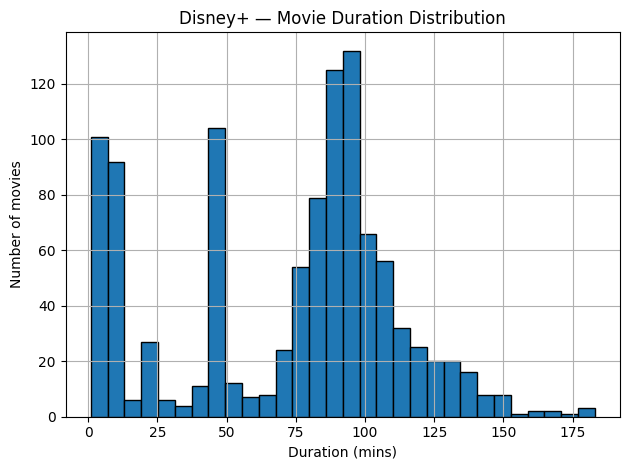

In [16]:
# Focus on typical feature-length films (exclude extreme outliers)
filtered_movies = clean_movies_df[clean_movies_df["duration_mins"] <= 300]

filtered_movies["duration_mins"].dropna().astype(int).hist(
    bins=30,
    edgecolor="black"
)

plt.title("Disney+ — Movie Duration Distribution")
plt.xlabel("Duration (mins)")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.show()

> *Note:* We can already see a large differemce in the duration distribution for movies available on disney+ compared to the other streaming services we analysed & examined their content, with large amount of movies appearing to have a duration less than 25 minutes.

## TV Show seasons distribution

Here, we inspect how many seasons TV shows on Disney+ typically have, compared to the other more established streaming services. To keep the plot readable, we focus on shows up to a chosen season threshold (long-running outliers exist).

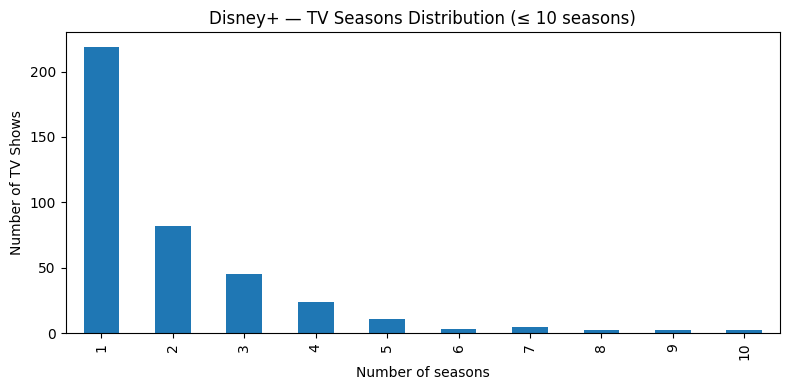

In [22]:
# Filtering for TV shows on Disney+ with 10 seasons or less, as few tv shows ever suceed enough to exceed this number
max_seasons = 10

filtered_tv = clean_shows_df[clean_shows_df["duration_seasons"].notna() & (clean_shows_df["duration_seasons"] <= max_seasons)]

shows_ax = filtered_tv.groupby("duration_seasons").size().plot(kind="bar", figsize=(8,4))
shows_ax.set_title(f"Disney+ — TV Seasons Distribution (≤ {max_seasons} seasons)")
shows_ax.set_xlabel("Number of seasons")
shows_ax.set_ylabel("Number of TV Shows")
plt.tight_layout()
plt.show()

> *Findings:* Most shows have relatively few seasons, with a small number of long-running series creating a long tail.
Filtering improves readability without changing the overall pattern.

## Cast size patterns

Cast lists are imperfect metadata but can still reveal structure:
- TV shows may have larger or more variable casts than movies
- long tails are expected (ensembles / anthology listings)

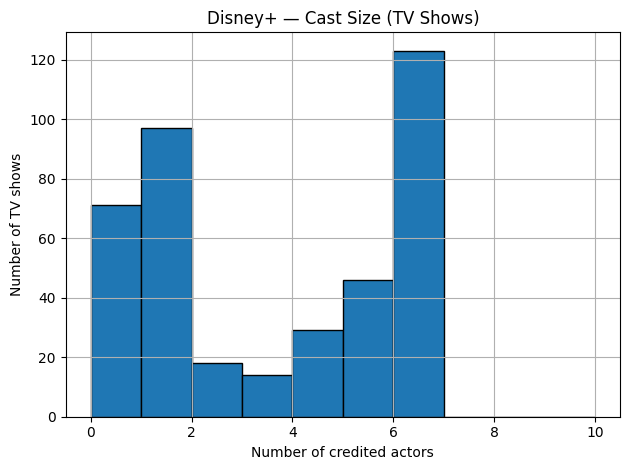

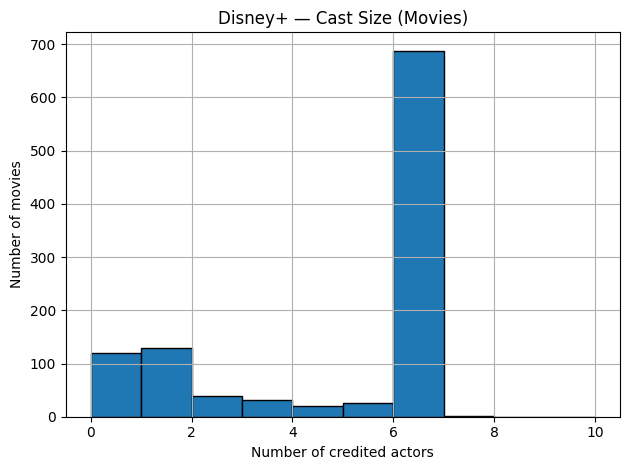

In [25]:
# Histograms of cast sizes in Movies & TV Shows on Amazon Prime
shows_cast = clean_shows_df.assign(cast_count=clean_shows_df["cast"].apply(len))
movies_cast = clean_movies_df.assign(cast_count=clean_movies_df["cast"].apply(len))

shows_cast["cast_count"].hist(bins=range(0, 11), edgecolor='black')
plt.title("Disney+ — Cast Size (TV Shows)")
plt.xlabel("Number of credited actors")
plt.ylabel("Number of TV shows")
plt.tight_layout()
plt.show()

movies_cast["cast_count"].hist(bins=range(0, 11), edgecolor='black')
plt.title("Disney+ — Cast Size (Movies)")
plt.xlabel("Number of credited actors")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.show()

> *Findings:* Cast-size distributions are right-skewed (many small casts, fewer large ensembles).
This suggests using medians/quantiles when comparing platforms rather than means; however, Disney+ appears to have generally smaller casts in both movies & TV shows compared to other platforms, with several titles apparently being listed with zero & 2 or less cast members even being acknowledged in these productions.

## Unique cast members (sanity check)

We compute the number of unique credited cast names across the catalog.
This is a rough indicator of metadata richness & helps interpret genre/cast aggregation later.

In [26]:
# Extracting unique cast members from the Disney+ dataset
disney_unique_cast = sorted(
    set(actor.strip() for actor in chain.from_iterable(clean_disney_df["cast"]) if isinstance(actor, str) and actor.strip())
)

print(f"Total unique cast members (Disney+): {len(disney_unique_cast)}")

Total unique cast members (Disney+): 3754


## Genre-level aggregation (using exploded rows)

In the dataframes of the streaming service, genres are multi-label. To aggregate per genre, we explode `listed_in` so each title contributes to each of its genres.
We then compute cast-related aggregates per genre to explore whether some genres tend to have larger ensembles.

In [30]:
movies_exploded = clean_movies_df.explode("listed_in").assign(cast_count=clean_movies_df["cast"].apply(len))
shows_exploded  = clean_shows_df.explode("listed_in").assign(cast_count=clean_shows_df["cast"].apply(len))

movie_genre_cast = movies_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
show_genre_cast  = shows_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)

print(f'{movie_genre_cast.head(10)} \n\n{show_genre_cast.head(10)}')

listed_in
Family              2215
Comedy              2014
Action-Adventure    1807
Animation           1500
Coming of Age        907
Fantasy              853
Drama                689
Science Fiction      434
Animals & Nature     342
Documentary          306
Name: cast_count, dtype: int64 

listed_in
Animation           643
Action-Adventure    539
Comedy              517
Kids                413
Coming of Age       261
Family              228
Fantasy             168
Docuseries          150
Animals & Nature     89
Drama                70
Name: cast_count, dtype: int64


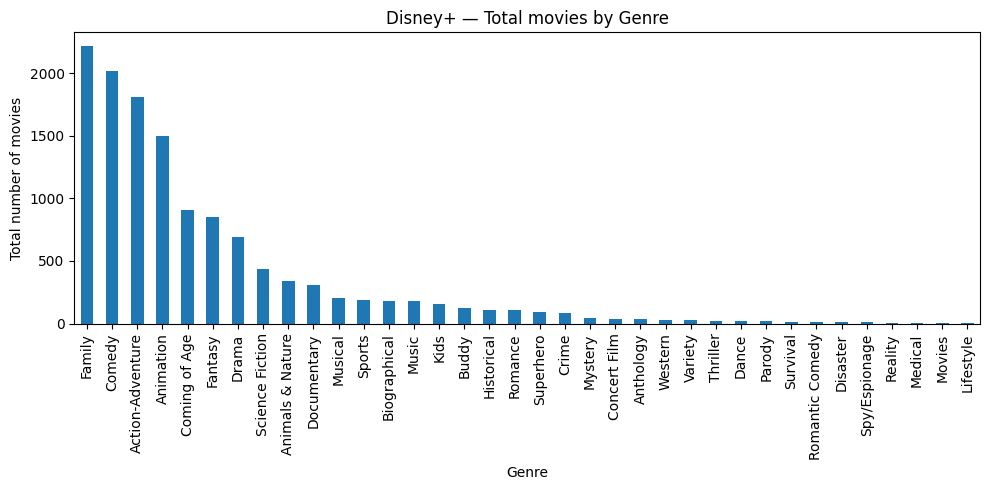

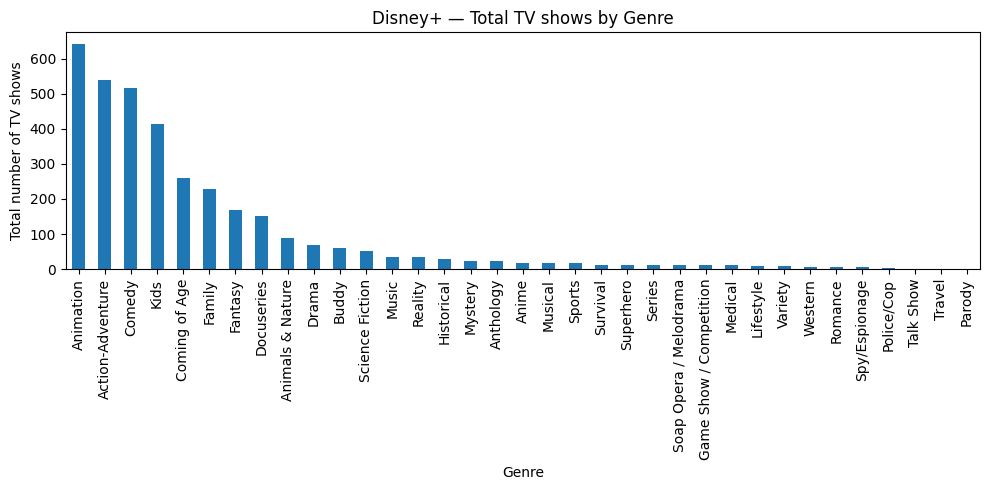

In [45]:
movie_genre_cast.plot(kind="bar", figsize=(10,5), title="Disney+ — Total movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Total number of movies")
plt.tight_layout()
plt.show()

show_genre_cast.plot(kind="bar", figsize=(10,5), title="Disney+ — Total TV shows by Genre")
plt.xlabel("Genre")
plt.ylabel("Total number of TV shows")
plt.tight_layout()
plt.show()

> *Findings:* Genre aggregates show strong concentration: a small number of genres dominate total credited cast counts.
This likely reflects both catalog size per genre & metadata completeness.

## Unique actors per genre (top N)

We estimate how many distinct cast names appear within each genre.
This is not a perfect measure (metadata quality varies), but it’s a useful proxy for genre “breadth”.

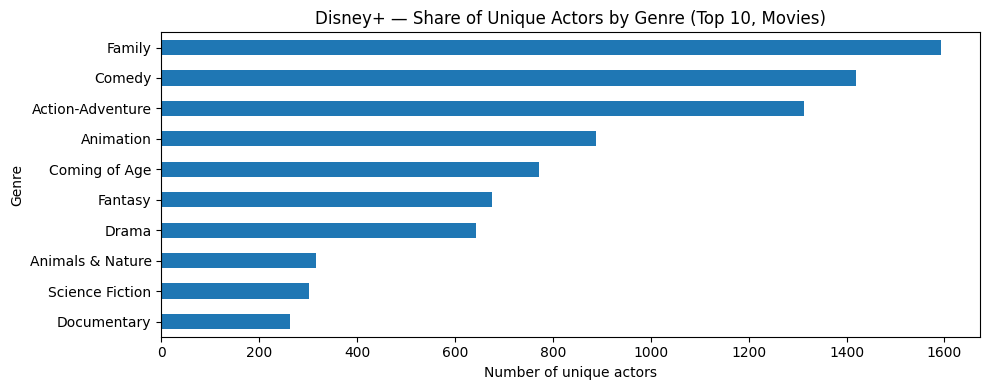

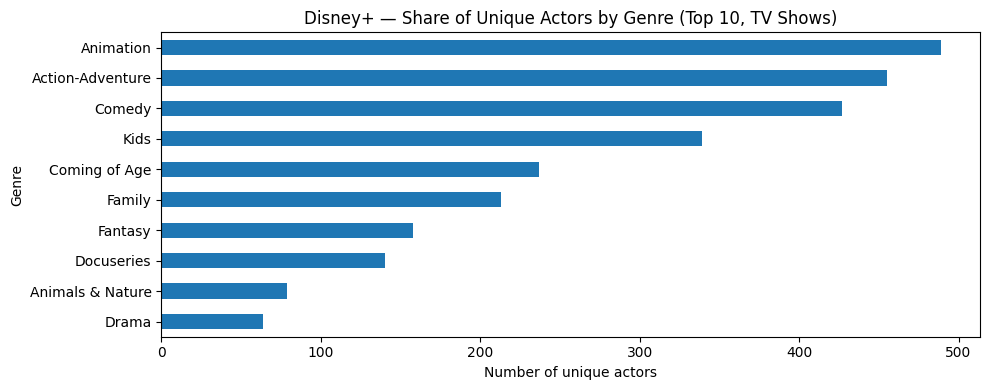

In [31]:
movie_unique_actors_per_genre = unique_actors_per_genre(clean_movies_df)
tv_unique_actors_per_genre = unique_actors_per_genre(clean_shows_df)

plot_top_unique_actors(movie_unique_actors_per_genre, "Disney+ — Share of Unique Actors by Genre (Top 10, Movies)")
plot_top_unique_actors(tv_unique_actors_per_genre, "Disney+ — Share of Unique Actors by Genre (Top 10, TV Shows)")

> *Note:* I initially plotted two very similar pie charts for a clear visual comparison between movie & tv show media on Netflix, but ended up choosing to switch to wrapping them with an external function in `streaming_func.py` & plotting them as horizontal bar charts to ensure consistent formatting & easier comparison.

In [33]:
# Answers how many for each movie & tv-show genre on Disney+, how many distinct actors have appeared in at least one movie of that genre
print(f'Number of unique actors per movie genre on Disney+: {len(movie_unique_actors_per_genre)}')
print(f'Number of unique actors per tv-show genre on Disney+: {len(tv_unique_actors_per_genre)}')

Number of unique actors per movie genre on Disney+: 36
Number of unique actors per tv-show genre on Disney+: 34


### Country of Production (Top N)

To analyse geographic production patterns, country lists are exploded so each country
contributes independently to aggregate counts.

A horizontal bar chart is used instead of a pie chart to improve readability & enable
clear comparison across countries, particularly where distributions are skewed.

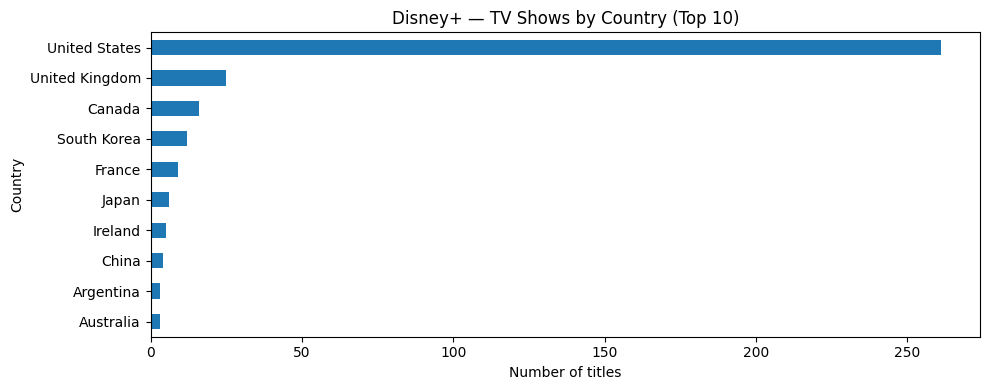

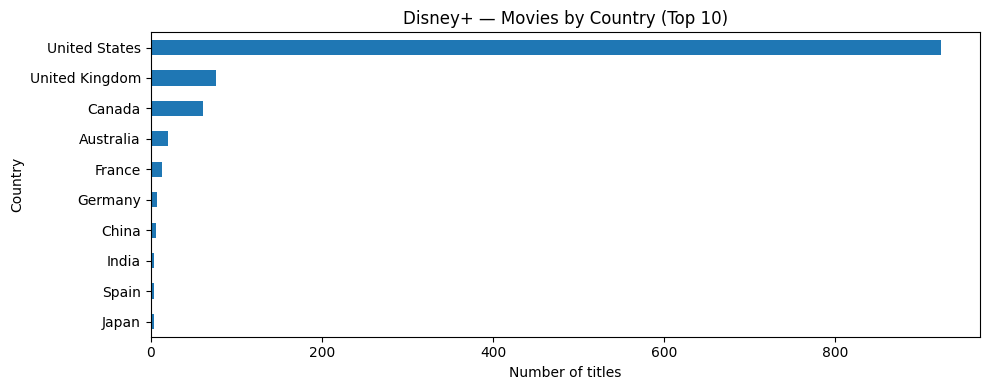

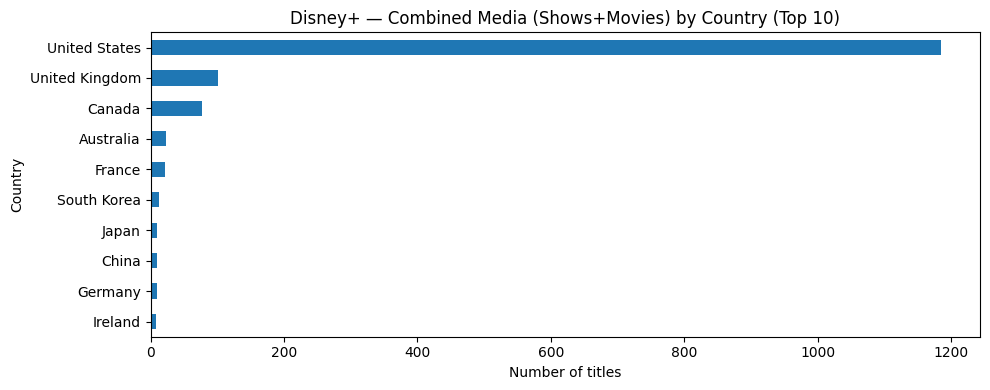

In [34]:
plot_top_countries(clean_shows_df["country"], "Disney+ — TV Shows by Country (Top 10)", top_n=10)
plot_top_countries(clean_movies_df["country"], "Disney+ — Movies by Country (Top 10)", top_n=10)
plot_top_countries(clean_disney_df["country"], "Disney+ — Combined Media (Shows+Movies) by Country (Top 10)", top_n=10)

### *Observations on countries of streaming media production*
+ The catalogue is mostly heavily dominated by the United States, with the UK in 2nd & Canada coming in 3rd
+ Tv shows show a stronger long-tail than Movies on Disney+ (more countries appear in the top 10 / counts spread out faster).
+ Combined media largely mirrors movies because movies typically outnumber shows (if true in your dataset).